# Introduction to Quickplots


Design Goals:
1. Point to a directory of simulation files
2. Return useful pandas dataframes
3. Provide common plots
4. Allow for flexibility and extension.

In [1]:

import marmot.quickplots as qp
from marmot.scenariohandlers import PlexosScenario, ReEDsScenario
import matplotlib.pyplot as plt

# path to folder with h5 files
test_path_2050 = r'C:\Users\MWEBB\Downloads\NTP_H5_20230825\test\Model model_2050 Solution'

# Points to a set of h5 files and combines
ps = PlexosScenario(test_path_2050)
ps.set_entity_map('zone')

zonal_map = ps._load_entity_map


# Reading Plexos Data
1. Get Dispatch
2. Get Installed Capacity
3. Get any Dataset/H5 group from 

### Dispatch Data

In [14]:
p_dispatch = ps.get_entity_dispatch()
print(p_dispatch.attrs)
p_dispatch.head(2)

{'units': 'MW'}


Entity                   caiso                                                
Technology               BECCS Biopower Curtailment      Demand  Geothermal   
Timestamp                                                                     
2050-01-01 00:00:00  1058.7651    288.0         0.0  101270.836  11990.8598  \
2050-01-01 01:00:00  1058.7651    266.3         0.0  101491.889  11990.8598   

Entity                                                               
Technology                 Hydro Land-based Wind      NG-CCS NG-CT   
Timestamp                                                            
2050-01-01 00:00:00  2866.466917        1112.133  32018.6935   0.0  \
2050-01-01 01:00:00  2866.466917        1017.287  30738.6935   0.0   

Entity                             ... northerngrid                 
Technology          Offshore Wind  ...        H2-CT         Hydro   
Timestamp                          ...                              
2050-01-01 00:00:00       244.470  ...    5586.3501  16013.403874  \
2050-01-01 01:00:00       256.608  ...    5586.3501  16013.403874   

Entity                                                               
Technology          Imports from Canada Land-based Wind     NG-CCS   
Timestamp                                                            
2050-01-01 00:00:00            1296.172        6712.732  3064.7571  \
2050-01-01 01:00:00            1296.172        7181.761  3064.7571   

Entity                                                            
Technology                 NG-CT Nuclear   PV       Storage  dPV  
Timestamp                                                         
2050-01-01 00:00:00  2267.157551     0.0  0.0  15851.057625  0.0  
2050-01-01 01:00:00  2254.326840     0.0  0.0  16724.385000  0.0  

[2 rows x 27 columns]

### Reading Arbitrary Plexos Data

1. Combines all h5 datasets within an h5 group.
2. Attaches Units to Columns.
3. Formats Timestamps to Datetime[ns]

In [3]:
regions_df = ps.get_plexos_h5group('ST', 'interval', 'regions')
regions_df.head(2)

aggregating interval regions
aggregating dataset: Exports
aggregating dataset: Fixed Load
aggregating dataset: Imports
aggregating dataset: Interregional Transmission Losses
aggregating dataset: Load
aggregating dataset: Native Load
aggregating dataset: Net Interchange
aggregating dataset: Price
aggregating dataset: Unserved Energy
formatting data
combining frames


Exports (MW)  Fixed Load (MW)  Imports (MW)   
regions Timestamp                                                          
p1      2050-01-01 00:00:00           0.0              0.0   9319.834961  \
        2050-01-01 01:00:00           0.0              0.0   9223.708008   

                             Interregional Transmission Losses (MW)   
regions Timestamp                                                     
p1      2050-01-01 00:00:00                               76.515846  \
        2050-01-01 01:00:00                               75.726639   

                                Load (MW)  Native Load (MW)   
regions Timestamp                                             
p1      2050-01-01 00:00:00  15045.946289      15045.946289  \
        2050-01-01 01:00:00  14953.103516      14953.103516   

                             Net Interchange (MW)  Price ($/MWh)   
regions Timestamp                                                  
p1      2050-01-01 00:00:00          -9319.834961     155.428955  \
        2050-01-01 01:00:00          -9223.708008     155.428955   

                             Unserved Energy (MW)  
regions Timestamp                                  
p1      2050-01-01 00:00:00                   0.0  
        2050-01-01 01:00:00                   0.0

In [4]:
lines_df = ps.get_plexos_h5group('ST', 'day', 'lines')
lines_df.head(2)

aggregating day lines
aggregating dataset: Export Limit
aggregating dataset: Flow
aggregating dataset: Hours Congested
aggregating dataset: Hours Congested Back
aggregating dataset: Import Limit
aggregating dataset: Loss
aggregating dataset: Shadow Price
aggregating dataset: Shadow Price Back
aggregating dataset: Violation
formatting data
combining frames


Export Limit (MW)  Flow (GWh)  Hours Congested (h)   
lines       Timestamp                                                        
p1 to p2_AC 2050-01-01         8287.03125         0.0                  0.0  \
            2050-01-02         8287.03125         0.0                  0.0   

                        Hours Congested Back (h)  Import Limit (MW)   
lines       Timestamp                                                 
p1 to p2_AC 2050-01-01                       5.0        -9392.24707  \
            2050-01-02                       1.0        -9392.24707   

                        Loss (GWh)  Shadow Price ($/MW)   
lines       Timestamp                                     
p1 to p2_AC 2050-01-01    0.832052                  0.0  \
            2050-01-02    0.868990                  0.0   

                        Shadow Price Back ($/MW)  Violation (GWh)  
lines       Timestamp                                              
p1 to p2_AC 2050-01-01                       0.0              0.0  
            2050-01-02                       0.0              0.0

### Stats for Peak Demand / Net Load

In [5]:
# Getting winter and summer peaks for Demand / Net Load

winter_summer_peaks = ps.get_winter_summer_peaks()
winter_summer_peaks

{'Winter Peak Demand': Timestamp('2050-12-20 15:00:00'),
 'Winter Peak Net Load': Timestamp('2050-12-19 00:00:00'),
 'Summer Peak Demand': Timestamp('2050-08-10 15:00:00'),
 'Summer Peak Net Load': Timestamp('2050-08-10 01:00:00')}

# Plotting - Marmot Quickplots

1. Plotting Dispatch or Installed Capacity (Technology stacks)
2. Plotting Peak Windows

<Axes: title={'center': 'Entity - Annual Dispatch Stack'}, ylabel='Generation and Demand (TWh)'>

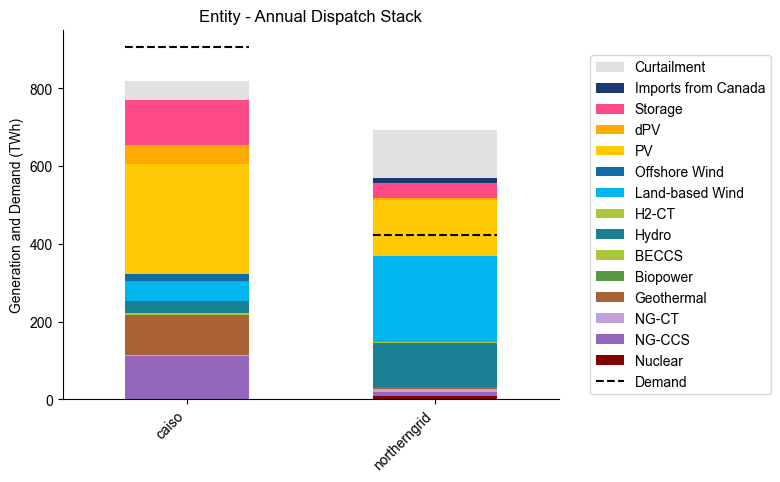

In [6]:
# Dispatch for each entity in the MultiIndex columns
qp.plot_annual_entity_dispatch_stack(p_dispatch)

<Axes: title={'center': 'System - Annual Dispatch Stack'}, ylabel='Generation and Demand (TWh)'>

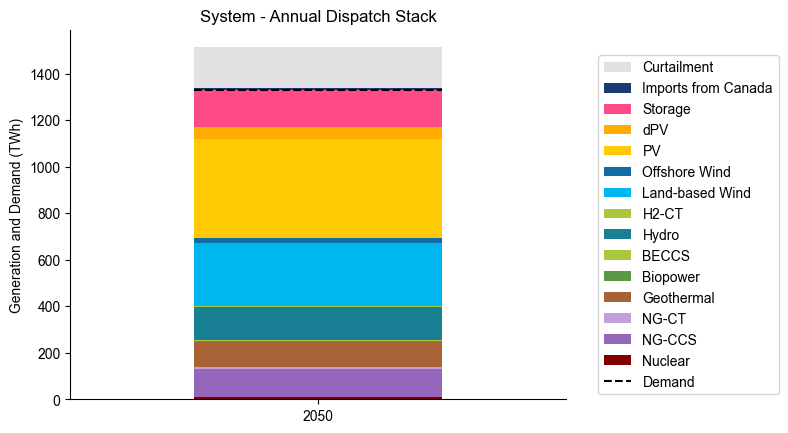

In [7]:
# Or plot the entire system dispatch
qp.plot_annual_system_dispatch_stack(p_dispatch)

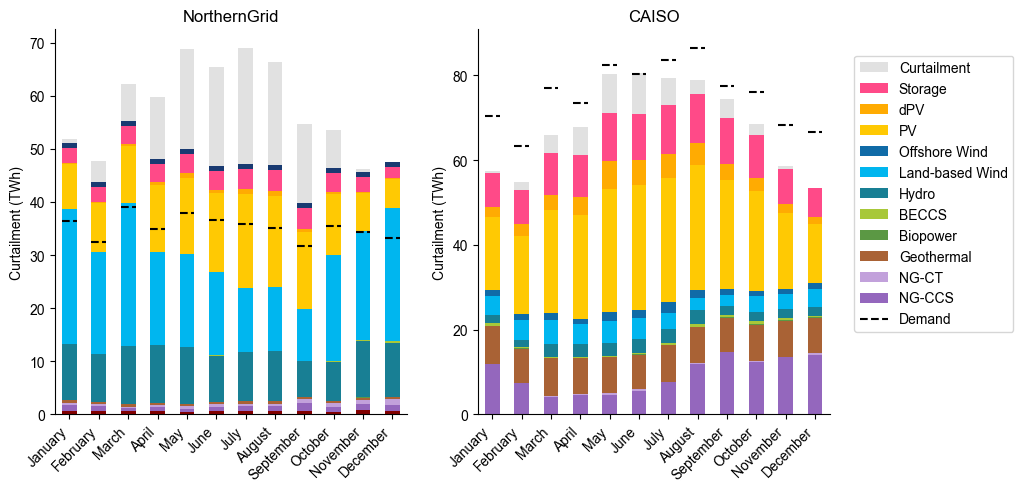

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
qp.plot_monthly_system_curtailment_stack(p_dispatch['northerngrid'], ax=ax[0])
qp.plot_monthly_system_curtailment_stack(p_dispatch['caiso'], ax=ax[1])
ax[0].set_title('NorthernGrid')
ax[1].set_title('CAISO')
ax[0].get_legend().remove()
plt.show()


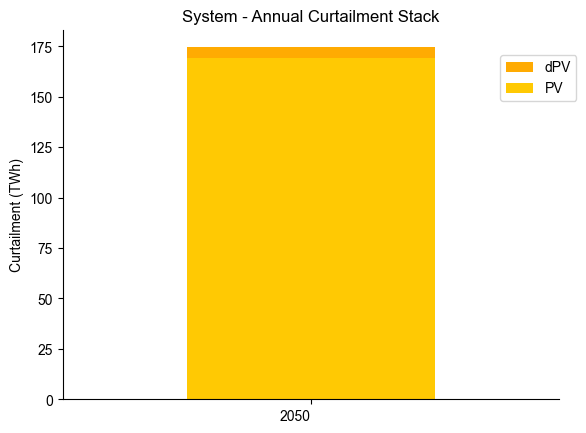

In [9]:
p_curtailment = ps.get_curtailment()
qp.plot_annual_system_curtailment_stack(p_curtailment)
plt.show()

### Peak/Min Demand Windows

<Axes: title={'center': 'Period of Peak Demand'}, ylabel='Generation and Demand (GW)'>

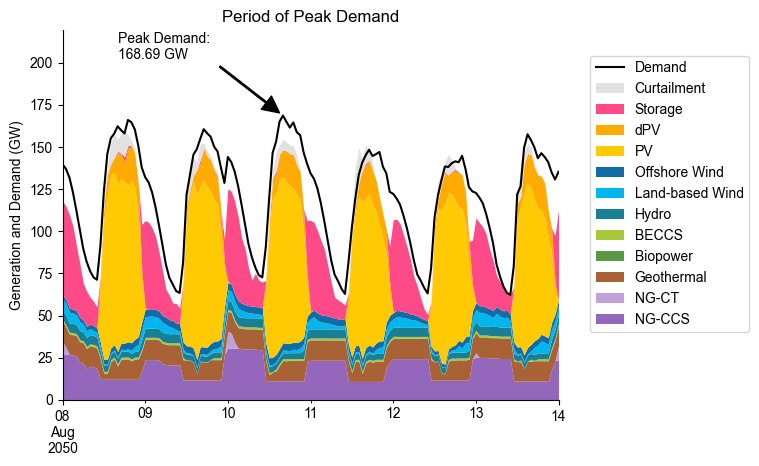

In [10]:
qp.plot_peak_demand_window(p_dispatch['caiso'], window_delta=10)

# Compare Between ReEDs and Plexos

In [11]:
rtest_path = r'\\nrelnas01\reeds\users\pbrown\reedsruns\main\v20230829_mainH0_Pacific_Z45'

rs = ReEDsScenario(rtest_path, 2050, load_entity_map=zonal_map)

r_dispatch = rs.get_entity_tech_aggregates()
r_dispatch.head()

Entity             caiso                                              
Technology         BECCS       Biopower   Curtailment    Geothermal   
Timestamp                                                             
2050-01-01  7.798340e+06  917053.762692  2.296769e+06  8.724839e+07  \

Entity                                                                 
Technology         Hydro Land-based Wind        NG-CCS         NG-CT   
Timestamp                                                              
2050-01-01  3.297080e+07    5.635110e+07  5.746254e+07  1.090851e+07  \

Entity                                  ...  northerngrid                 
Technology Offshore Wind            PV  ...         H2-CT         Hydro   
Timestamp                               ...                               
2050-01-01  1.014507e+07  2.528662e+08  ...  7.240040e+06  1.186914e+08  \

Entity                                                                       
Technology Imports from Canada Land-based Wind        NG-CCS         NG-CT   
Timestamp                                                                    
2050-01-01        9.479957e+06    2.424724e+08  4.229526e+06  4.455385e+06  \

Entity                                                              
Technology       Nuclear            PV       Storage           dPV  
Timestamp                                                           
2050-01-01  7.580936e+06  1.773720e+08  3.978821e+07  6.354409e+06  

[1 rows x 25 columns]

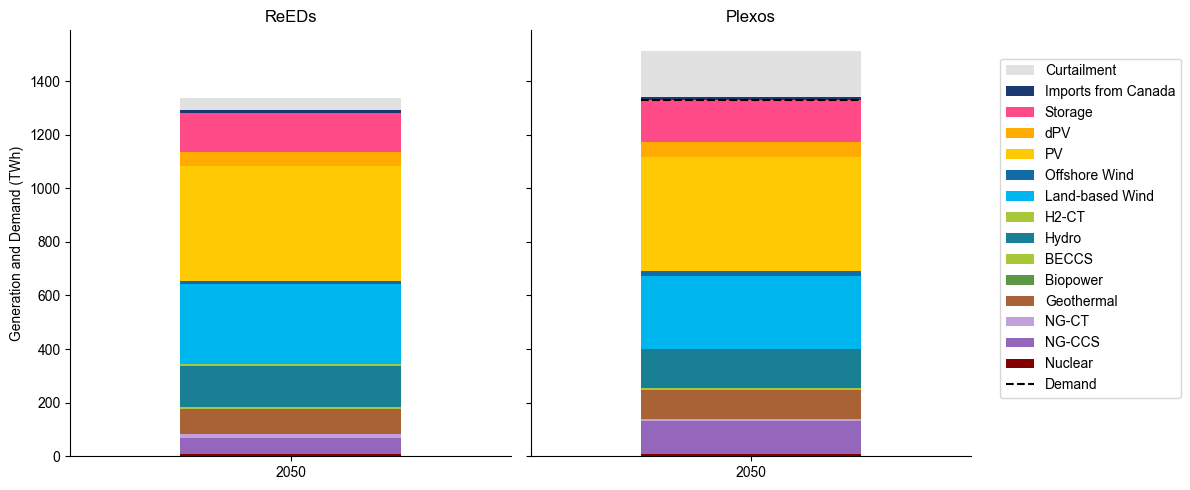

In [12]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(12,5))

# Quickplots to format 90% of the plot
qp.plot_annual_system_dispatch_stack(r_dispatch, ax=ax[0])
qp.plot_annual_system_dispatch_stack(p_dispatch, ax=ax[1])

#Customize Plots Further with standard Matplotlib calls.
ax[0].set_title('ReEDs')
ax[1].set_title('Plexos')

ax[0].get_legend().remove()

for label in ax[0].get_xticklabels(0):
    label.set_rotation(0)
plt.xticks(rotation=0)
plt.tight_layout()